In [2]:
import os
import json
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [7]:
for file in os.listdir():
    print(file)
    if file.endswith('.csv'):
        temp_df = pd.read_csv(file)


.ipynb_checkpoints
client.csv
county_id_to_name_map.json
electricity_prices.csv
enefit
Enefit Test.ipynb
example_test_files
forecast_weather.csv
gas_prices.csv
historical_weather.csv
public_timeseries_testing_util.py
train.csv
venv


In [12]:
with open('county_id_to_name_map.json', 'r') as fw:
    county_lookup = json.load(fw)

In [9]:
train_df = pd.read_csv('train.csv')

In [14]:
forecast_df = pd.read_csv('forecast_weather.csv')
historical_df = pd.read_csv('historical_weather.csv')
electricity_df = pd.read_csv('electricity_prices.csv')
gas_df = pd.read_csv('gas_prices.csv')
client_df = pd.read_csv('client.csv')

In [19]:
client_df[(client_df.data_block_id == 4) & (client_df.county == 0)]

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
122,1,0,108,952.89,0,2021-09-03,4
123,2,0,17,166.40,0,2021-09-03,4
124,3,0,688,7207.88,0,2021-09-03,4
125,0,0,5,400.00,1,2021-09-03,4
126,1,0,43,1411.00,1,2021-09-03,4
127,3,0,265,13417.79,1,2021-09-03,4


In [31]:
train_df[(train_df.data_block_id == 1) & (train_df.county == 0)]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
2928,0,0,1,1.687,0,2021-09-02 00:00:00,1,2928,0
2929,0,0,1,109.366,1,2021-09-02 00:00:00,1,2929,0
2930,0,0,2,0.000,0,2021-09-02 00:00:00,1,2930,1
2931,0,0,2,21.008,1,2021-09-02 00:00:00,1,2931,1
2932,0,0,3,1.003,0,2021-09-02 00:00:00,1,2932,2
...,...,...,...,...,...,...,...,...,...
5741,0,1,0,76.400,1,2021-09-02 23:00:00,1,5741,3
5742,0,1,1,0.000,0,2021-09-02 23:00:00,1,5742,4
5743,0,1,1,572.467,1,2021-09-02 23:00:00,1,5743,4
5744,0,1,3,0.838,0,2021-09-02 23:00:00,1,5744,5


In [33]:
print(f"Total Observed Hours: {len(train_df.datetime.drop_duplicates().to_list())}")
print(f"Counties: {len(train_df.county.drop_duplicates().to_list())}")
print(f"Prediction Types: {len(train_df.prediction_unit_id.drop_duplicates().to_list())}")
print(f"Data Blocks: {len(train_df.data_block_id.drop_duplicates().to_list())}")

Total Observed Hours: 15312
Counties: 16
Prediction Types: 69
Data Blocks: 638


<h4>Business</h4|>

         county  is_business  product_type   target  is_consumption  \
9             0            1             1  501.760               1   
131           0            1             1  486.297               1   
253           0            1             1  458.562               1   
375           0            1             1  511.794               1   
497           0            1             1  520.318               1   
...         ...          ...           ...      ...             ...   
2017711       0            1             1  761.060               1   
2017841       0            1             1  827.122               1   
2017971       0            1             1  808.137               1   
2018101       0            1             1  870.630               1   
2018231       0            1             1  889.251               1   

                    datetime  data_block_id   row_id  prediction_unit_id  
9        2021-09-01 00:00:00              0        9                   4

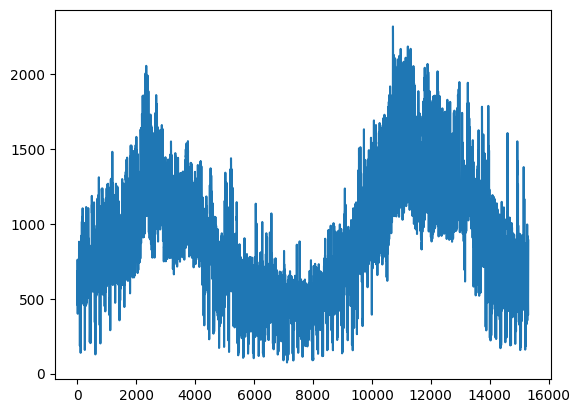

In [46]:
for county_id in train_df.county.drop_duplicates().to_list()[0:1]:
    county_df = train_df[train_df.county == county_id]
    for product_type in county_df.product_type.drop_duplicates().to_list()[0:1]:
        cpt_df = county_df[county_df.product_type == product_type]
        consumed_df = cpt_df[(cpt_df.is_business == 1) & (cpt_df.is_consumption == 1)]
        print(consumed_df.sort_values('datetime', ascending=True))
        x = range(len(consumed_df))
        y = consumed_df.target.to_list()
        plt.plot(x, y)
        plt.show()



<h4>Consumer</h4>

In [38]:
for county_id in train_df.county.drop_duplicates().to_list()[0:1]:
    county_df = train_df[train_df.county == county_id]
    for product_type in county_df.product_type.drop_duplicates().to_list():
        cpt_df = county_df[county_df.product_type == product_type]
        non_biz_cpt_df = cpt_df[cpt_df.is_business == 0]
        print(non_biz_cpt_df)

         county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
122           0            0             1    1.132               0   
123           0            0             1   77.691               1   
244           0            0             1    0.490               0   
...         ...          ...           ...      ...             ...   
2017963       0            0             1  569.301               1   
2018092       0            0             1    5.086               0   
2018093       0            0             1  577.499               1   
2018222       0            0             1    2.921               0   
2018223       0            0             1  544.221               1   

                    datetime  data_block_id   row_id  prediction_unit_id  
0        2021-09-01 00:00:00              0        0                   0